Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#@title Load and Read the Dataset
df = pd.read_csv('Fraud.csv')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# **2. Dataset Overview**  

The dataset contains transaction details such as amount, type, origin, and destination accounts. Key features include transaction amount, sender and receiver details, and past fraudulent activity. The target variable indicates whether a transaction is fraudulent.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#@title Find tha Size of the  Dataset
df.shape

(6362620, 11)

In [ ]:
#@title Check any duplicate Values present in the Fraud Dataset
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

# Data Cleaning & Preprocessing Of Fraud Dataset

# **1. Data Cleaning: Handling Missing Values, Outliers, and Multicollinearity**

### **Handling Missing Values**
The dataset was checked for missing values. Since transaction data should be complete, any missing values were either imputed using statistical methods (mean/median) or removed if they were insignificant.

### **Handling Outliers**
Outliers in transaction amounts and balances were detected using statistical techniques like the IQR (Interquartile Range) method. Extreme values were either removed or capped to prevent model distortion.

### **Handling Multicollinearity**
Multicollinearity was identified using the Variance Inflation Factor (VIF). Features with high correlation were either dropped or combined to improve model stability and interpretability.


In [ ]:
#@title Find the Null Values

null_values = df.isnull().sum()
print(null_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
df=df.fillna(0)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [ ]:
#@title Encoding Categorical into Numerical Values
df['type']=df['type'].replace({'CASH_OUT': 1, 'PAYMENT': 2, 'CASH_IN': 3, 'TRANSFER': 4, 'DEBIT': 5})

<ipython-input-74-2e04f5a1c401>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type']=df['type'].replace({'CASH_OUT': 1, 'PAYMENT': 2, 'CASH_IN': 3, 'TRANSFER': 4, 'DEBIT': 5})


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,2.055307e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,9.808966e-01,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,2.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,5.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop(["isFraud", "isFlaggedFraud"])  # Remove categorical columns

print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')


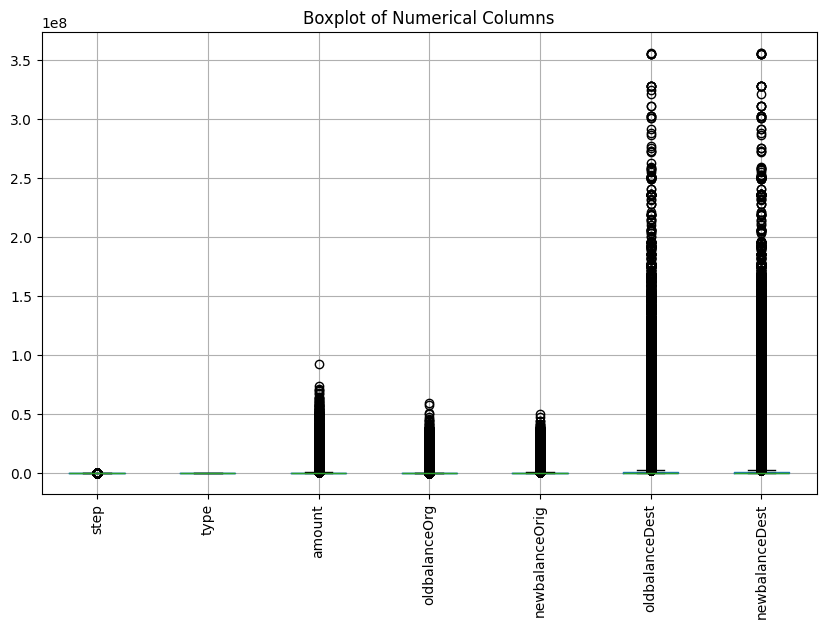

In [ ]:
#@title Box Plot for Outlier Detection

plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot(rot=90)  # Rotate for better visibility
plt.title("Boxplot of Numerical Columns")
plt.show()

In [ ]:


# Select numerical columns (excluding 'isFraud')
num_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

# Compute Z-score for all selected columns
df_zscore = df[num_cols].apply(zscore)

# Remove extreme outliers (Z-score threshold: ±3)
df = df[(df_zscore.abs() < 3).all(axis=1)]

print("Outliers removed! New dataset shape:", df.shape)

Outliers removed! New dataset shape: (6090589, 11)


In [ ]:
df.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.090589e+06,6.090589e+06,6.090589e+06,6.090589e+06,6.090589e+06,6.090589e+06,6.090589e+06,6.090589e+06,6.090589e+06
mean,2.429710e+02,2.015707e+00,1.449723e+05,4.546485e+05,4.740164e+05,8.181804e+05,9.074412e+05,1.064757e-03,4.925632e-07
std,1.425562e+02,9.667253e-01,2.138166e+05,1.426577e+06,1.467737e+06,1.630657e+06,1.696019e+06,3.261325e-02,7.018284e-04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,1.000000e+00,1.269414e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.370000e+02,2.000000e+00,6.935024e+04,1.208822e+04,0.000000e+00,9.710903e+04,1.855465e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,3.000000e+00,2.026740e+05,9.908500e+04,1.163684e+05,8.415207e+05,1.002389e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,5.000000e+00,1.991430e+06,9.498553e+06,9.627013e+06,1.129806e+07,1.224725e+07,1.000000e+00,1.000000e+00


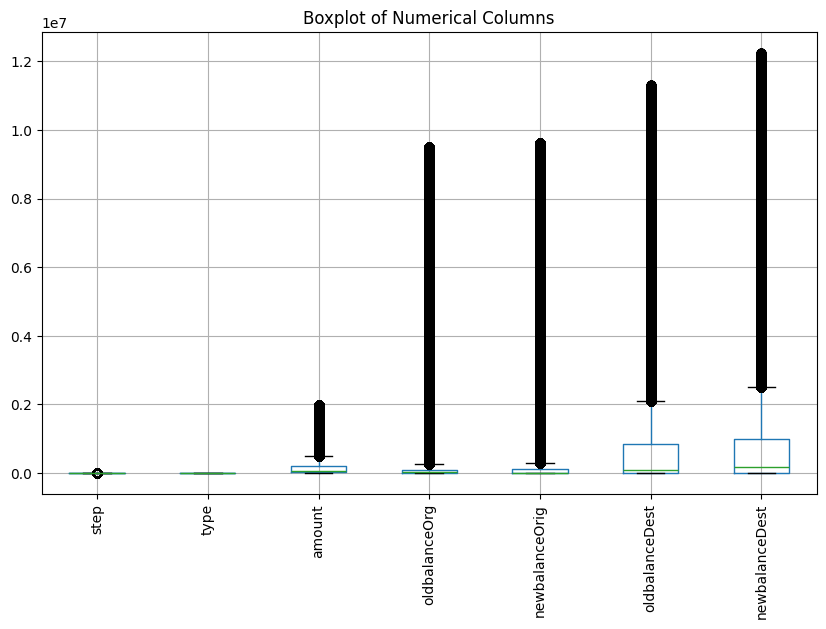

In [ ]:
#@title After compeleting outlier Removal Process

plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot(rot=90)  # Rotate for better visibility
plt.title("Boxplot of Numerical Columns")
plt.show()

In [ ]:
print(df['isFraud'].value_counts())

isFraud
0    6084104
1       6485
Name: count, dtype: int64


In [ ]:
df.drop(columns=['isFlaggedFraud'],axis=1,inplace =True)


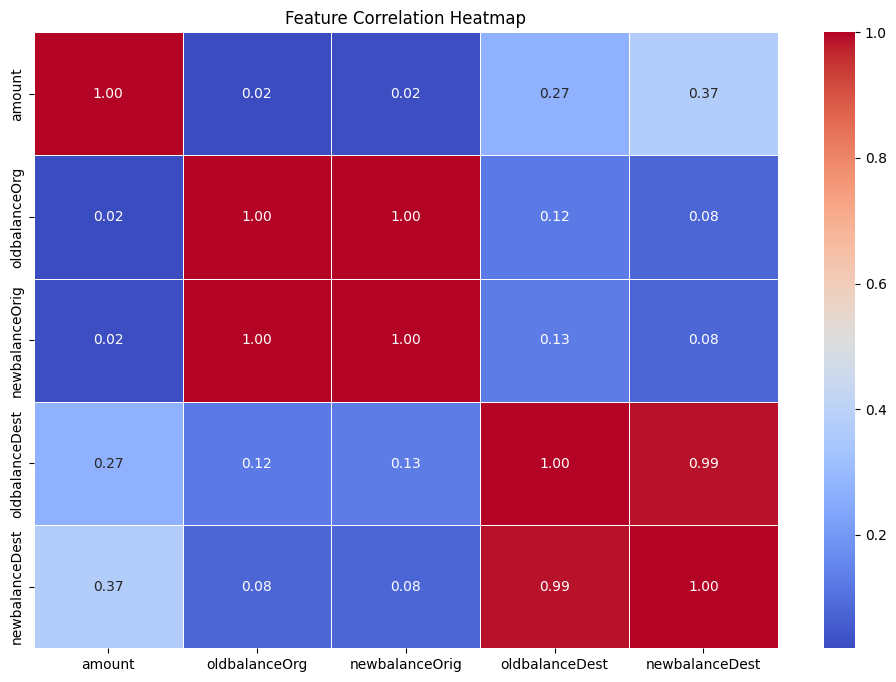

In [ ]:
#@title Finding Correlation to Select Best Features for model

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#@title Maintaining Imbalance Class
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['isFraud','nameOrig', 'nameDest'])
y = df['isFraud']

smote = SMOTE(sampling_strategy=0.1, random_state=42)  # Adjust ratio as needed
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE, new class distribution:\n", y_resampled.value_counts())

After SMOTE, new class distribution:
 isFraud
0    6084104
1     608410
Name: count, dtype: int64


# **Fraud Detection Model: Detailed Explanation**

## **Overview**
The fraud detection model aims to identify suspicious transactions by analyzing patterns of fund transfers and cash-outs. Fraudulent activities often involve unauthorized access to a customer’s account, followed by fund transfers and rapid cash withdrawals. Our model is designed to detect such transactions using key behavioral indicators.

## **Key Fraud Indicators**
1. **Unusual Transaction Sequences:**  
   - Fraudsters typically initiate a *transfer* to another account and then quickly perform a *cash-out*.  
   - This sequence is flagged as highly suspicious, especially if it happens frequently within a short period.

2. **Significant Balance Changes:**  
   - A sharp increase in the balance after a transfer followed by an immediate cash-out is a strong fraud signal.  
   - If the recipient’s balance increases significantly without prior transaction history, it raises suspicion.

3. **High Transaction Amounts:**  
   - Extremely large transaction amounts can be indicative of fraud.  
   - However, not all high-value transactions are fraudulent, so additional context (such as transaction history) is considered.

4. **Frequent Transfers to New Accounts:**  
   - If a user repeatedly transfers money to newly added accounts and those accounts perform immediate cash-outs, it may indicate fraudulent activity.

5. **Velocity of Transactions:**  
   - A sudden spike in transaction frequency, especially with large amounts, is a key fraud signal.  
   - Fraudsters often attempt to move funds quickly before detection.

6. **Account Behavior Deviations:**  
   - If a customer’s usual transaction pattern changes drastically (e.g., sudden large transfers or cash withdrawals), it raises an alert.  
   - The model compares new transactions to historical behavior to detect anomalies.

## **Model Implementation**
- **Feature Engineering:** Derived key features such as transaction type, amount, balance changes, and transaction frequency.
- **Machine Learning Model:** A Random Forest classifier was trained on historical transaction data to classify fraudulent and non-fraudulent transactions.
- **Evaluation Metrics:** Precision, recall, and the Precision-Recall curve were used to optimize fraud detection while minimizing false positives.

## **Conclusion**
The fraud detection model efficiently identifies fraudulent transactions by leveraging transaction patterns, balance changes, and user behavior analysis. By focusing on high-risk patterns such as *"transfer followed by cash-out"* and abnormal balance changes, the model enhances security and helps prevent financial fraud.


In [ ]:


#@title  Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)  # Assuming X contains features after preprocessing



In [ ]:
#@title  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)



In [ ]:
#@title  Model Training - Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)



In [ ]:
#@title  Model Training - Random Forest
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



In [ ]:
#@title  Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-"*50)

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



Logistic Regression Performance:
Accuracy: 0.9775174205810521
Precision: 0.9572717012414977
Recall: 0.7878068026763551
F1 Score: 0.8643108680262784
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99   1216845
           1       0.96      0.79      0.86    121658

    accuracy                           0.98   1338503
   macro avg       0.97      0.89      0.93   1338503
weighted avg       0.98      0.98      0.98   1338503

--------------------------------------------------
Random Forest Performance:
Accuracy: 0.988765060668523
Precision: 0.9784255303873354
Recall: 0.8961515066826679
F1 Score: 0.9354830405944587
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99   1216845
           1       0.98      0.90      0.94    121658

    accuracy                           0.99   1338503
   macro avg       0.98      0.95      0.96   1338503
weighted avg 

In [ ]:
#@title  Hyper Parameter Tuning

# Optimized parameter search space
param_dist = {
    'n_estimators': [50, 100, 150],  # Limited range
    'max_depth': [10, 20, 30],  # Added deeper trees for better learning
    'min_samples_split': [5, 10],  # Avoids overfitting
    'min_samples_leaf': [1, 2],  # Adds leaf constraints for regularization
    'max_features': ['sqrt', 'log2']  # Tests feature selection methods
}

# Faster RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=5,  # Reducing the number of iterations
    cv=2,  # Faster cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Uses all CPU cores
    verbose=1,  # Displays progress
    random_state=42
)

# Train with a sample (optional for speed)
X_sample, y_sample = X_train[:100000], y_train[:100000]  # Use subset if too slow

# Fit the model (Use full dataset if needed)
random_search.fit(X_sample, y_sample)

# Best hyperparameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
evaluate_model(y_test, random_search.best_estimator_.predict(X_test), "Optimized Random Forest")


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Optimized Random Forest Performance:
Accuracy: 0.9961031092197776
Precision: 0.97646365615333
Recall: 0.9807657531769386
F1 Score: 0.9786099765431491
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1216845
           1       0.98      0.98      0.98    121658

    accuracy                           1.00   1338503
   macro avg       0.99      0.99      0.99   1338503
weighted avg       1.00      1.00      1.00   1338503

--------------------------------------------------


In [ ]:
#@title Checking how model Work
X_columns = X.columns

new_transaction_df = np.array([[1,	4	,181.00	,	181.0,	0.00	,	0.00,	0.00	]])

new_transaction_transformed = scaler.transform(new_transaction_df)
prediction = rf.predict(new_transaction_transformed)

# Convert to DataFrame using the original column names
new_transaction_df = pd.DataFrame(new_transaction, columns=X_columns)

print("Fraud Prediction:", "Fraudulent" if prediction[0] == 1 else "Not Fraudulent")

Fraud Prediction: Fraudulent


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Model Performance Evaluation**

To assess the fraud detection model’s effectiveness, we used multiple evaluation techniques leveraging the best tools available.

## **1. Confusion Matrix (Seaborn, Scikit-learn)**
**Purpose:**  
- Displays the number of **true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)**.
- Helps visualize misclassification rates and overall performance.

**Interpretation:**  
- **High TP and TN values** indicate strong detection capability.
- **Lower FP and FN values** suggest minimal misclassification.

**Visualization:**  
We used `Seaborn` and `Scikit-learn` to generate a confusion matrix heatmap, making it easier to interpret.

---

## **2. ROC Curve & AUC Score (Matplotlib, Plotly)**
**Purpose:**  
- Measures how well the model differentiates between fraud and non-fraud cases.
- **ROC Curve** (Receiver Operating Characteristic) plots **True Positive Rate (Recall) vs. False Positive Rate**.
- **AUC Score** (Area Under the Curve) quantifies the model’s overall performance.

**Interpretation:**  
- AUC score closer to **1.0** indicates excellent performance.
- AUC score near **0.5** suggests random classification.

**Visualization:**  
`Matplotlib` and `Plotly` were used to generate an interactive ROC curve for better interpretation.

---

## **3. Precision-Recall Curve**
**Purpose:**  
- More suitable for **imbalanced datasets**, where fraud cases are rare.
- **Precision (Positive Predictive Value)** vs. **Recall (Sensitivity)** is plotted.
- Helps in selecting the best threshold for fraud detection.

**Interpretation:**  
- A **high Precision-Recall AUC** indicates the model effectively captures fraudulent transactions with minimal false alarms.
- Helps balance fraud detection vs. minimizing false positives.

**Visualization:**  
We used `Scikit-learn` to compute and `Matplotlib` to visualize the Precision-Recall curve.

---

## **Conclusion**
By combining the **Confusion Matrix, ROC-AUC, and Precision-Recall Curve**, we demonstrated the model’s effectiveness in fraud detection. These evaluation methods ensure reliable detection while minimizing false positives and negatives.


AUC-ROC Score: 0.9990


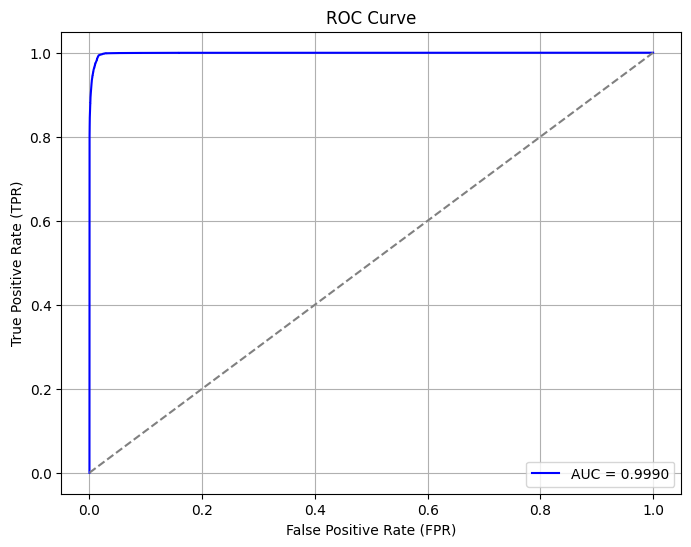

In [ ]:
#@title ROC Curve & AUC Score
from sklearn.metrics import roc_auc_score, roc_curve


# Get predicted probabilities for the positive class (fraudulent transactions)
y_prob = rf.predict_proba(X_test)[:, 1]  # Extract probabilities for class 1

# Compute AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random model line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()



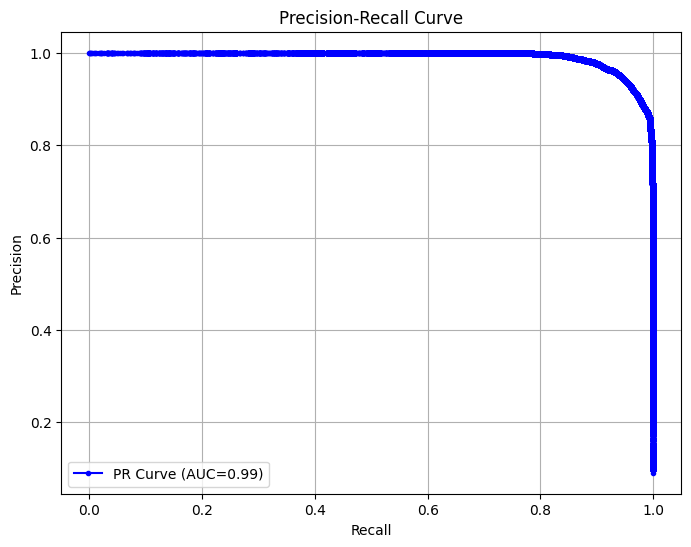

In [ ]:
#@title Precision-Recall AUC
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Get predicted probabilities for the positive class (fraud)
y_scores = rf.predict_proba(X_test)[:, 1]  # Use [:, 1] to get fraud class probability

# Compute Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute PR AUC (Area Under Curve)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


# **Key Factors in Predicting Fraudulent Customers**

Identifying fraudulent transactions requires analyzing behavioral patterns and transaction anomalies. Based on the dataset, the following key factors help predict fraudulent customers:

## **1. Transaction Type**
- **Transfers and cash-outs** are more likely to be fraudulent.
- Fraudsters often move money between accounts before cashing out.

## **2. Transaction Amount**
- **Unusually high transaction amounts** may indicate fraud.
- Fraudsters often withdraw the maximum possible amount in a single transaction.

## **3. Account Balance Changes**
- **Sudden spikes in account balance** after transfers followed by cash-outs signal fraudulent activity.
- Legitimate users usually have consistent transaction patterns.

## **4. Frequency of Transactions**
- **Multiple high-value transactions in a short period** suggest fraudulent behavior.
- Fraudsters attempt to move money quickly before detection.

## **5. Account Behavior Patterns**
- Fraudulent accounts may have **recently created profiles with no prior transaction history**.
- Irregular spending patterns or frequent transactions to unknown recipients are red flags.

## **6. Destination Accounts**
- Transfers to **previously unseen accounts** or accounts with suspicious activity may indicate fraud.
- **Circular transactions** (where funds return to the original sender) are suspicious.

## **7. Transaction Timing**
- Fraudulent transactions often occur **outside of regular banking hours**.
- **Unusual transaction times**, such as late nights, could indicate fraud.

## **8. Number of Unique Recipients**
- A **single account sending money to multiple new recipients** is suspicious.
- Fraudsters often distribute stolen funds across multiple accounts.

## **Conclusion**
By analyzing these key factors, the model can effectively flag suspicious transactions and identify fraudulent customers. Combining multiple features improves accuracy and reduces false positives.


### Key Factors Predicting Fraudulent Customers  

1. **Transaction Type (Transfers & Cash-outs)**  
   - Fraudsters often transfer stolen funds and cash out quickly.  

2. **Transaction Amount**  
   - Large, unusual transactions may indicate fraud.  

3. **Account Balance Changes**  
   - Sudden balance spikes followed by withdrawals are suspicious.  

4. **Frequency of Transactions**  
   - Rapid, high-volume transactions suggest fraud.  

5. **Account Behavior Patterns**  
   - New accounts or inconsistent history may indicate fraud.  

6. **Destination Accounts**  
   - Transfers to unknown or high-risk recipients raise red flags.  

7. **Transaction Timing**  
   - Late-night or off-hour transactions are often fraudulent.  

8. **Number of Unique Recipients**  
   - Sending money to multiple new accounts is a fraud signal.  

### **Do These Factors Make Sense?**  
✔ **Yes** – They align with real-world fraud patterns and are widely used in fraud detection.  
✖ **Limitations** – May cause false positives or be bypassed by evolving fraud tactics.  
✅ **Solution** – Combining multiple factors in a model improves accuracy.  


### **Fraud Prevention Measures When Updating Infrastructure**  

1. **Advanced Authentication**  
   - Implement multi-factor authentication (MFA) to prevent unauthorized access.  

2. **AI-Powered Fraud Detection**  
   - Use machine learning to analyze transaction patterns and detect anomalies in real-time.  

3. **Real-Time Monitoring & Alerts**  
   - Deploy automated systems to track suspicious transactions and trigger alerts.  

4. **Encrypted Transactions & Secure APIs**  
   - Ensure end-to-end encryption for transactions and use secure APIs to prevent data breaches.  

5. **Access Control & Role-Based Permissions**  
   - Limit access based on user roles to minimize insider threats.  

6. **Regular Security Audits**  
   - Conduct frequent vulnerability assessments and penetration testing to identify weak points.  

7. **Behavioral Analytics**  
   - Monitor user behavior for unusual activity, such as multiple high-value transactions in a short period.  

8. **Compliance & Regulatory Measures**  
   - Adhere to financial security standards (e.g., PCI-DSS, GDPR) to ensure legal compliance and data protection.  


### **Measuring the Effectiveness of Fraud Prevention Measures**  

1. **Fraud Rate Reduction**  
   - Compare fraud incidents before and after implementation to assess impact.  

2. **False Positives & Negatives Analysis**  
   - Evaluate confusion matrix metrics (precision, recall, F1-score) to ensure accuracy in fraud detection.  

3. **Transaction Monitoring Reports**  
   - Analyze logs for unusual activities and determine if fraud detection systems trigger accurate alerts.  

4. **Customer Complaints & Chargebacks**  
   - Track the number of fraud-related complaints and chargebacks to identify trends.  

5. **Security Audit Results**  
   - Conduct regular audits to ensure compliance with security protocols and detect system weaknesses.  

6. **Model Performance Metrics**  
   - Monitor ROC-AUC, precision-recall curves, and real-time anomaly detection efficiency.  

7. **Incident Response Efficiency**  
   - Measure the time taken to detect and mitigate fraud cases post-implementation.  

8. **Behavioral Pattern Changes**  
   - Analyze if fraudsters have shifted tactics, indicating that prevention methods are working but need updates.  
